# Ch10. K-Means Clustering

In [ ]:
# mount
from google.colab import drive
drive.mount('/content/drive')

## import

In [3]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# dpp
from sklearn.preprocessing import StandardScaler

In [5]:
# create model
from sklearn.cluster import KMeans

## read.csv
- shape
- keys

In [8]:
utils = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/youtube_others/_data/Utilities.csv")
utils.head()

,Company,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
0,Arizona,1.06,9.2,151,54.4,1.6,9077,0.0,0.628
1,Boston,0.89,10.3,202,57.9,2.2,5088,25.3,1.555
2,Central,1.43,15.4,113,53.0,3.4,9212,0.0,1.058
3,Commonwealth,1.02,11.2,168,56.0,0.3,6423,34.3,0.700
4,NY,1.49,8.8,192,51.2,1.0,3300,15.6,2.044


In [9]:
utils.shape

(22, 9)

In [12]:
utils.columns # == utils.keys()

Index(['Company', 'Fixed_charge', 'RoR', 'Cost', 'Load_factor',
       'Demand_growth', 'Sales', 'Nuclear', 'Fuel_Cost'],
      dtype='object')

## dpp

#### set index

In [14]:
# 표준화하기 위해 연속형 자료를 제외하고 인덱스(라벨)로 지정
utils1 = utils.set_index('Company')
utils1.head()

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
Company,,,,,,,,
Arizona,1.06,9.2,151,54.4,1.6,9077,0.0,0.628
Boston,0.89,10.3,202,57.9,2.2,5088,25.3,1.555
Central,1.43,15.4,113,53.0,3.4,9212,0.0,1.058
Commonwealth,1.02,11.2,168,56.0,0.3,6423,34.3,0.700
NY,1.49,8.8,192,51.2,1.0,3300,15.6,2.044


#### standardization
- 정규분포를 따르도록 표준화 ~ N(0,1)
- fit, transform, fit_transform
```python
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Method Chaining
X_scaled = scaler.fit(X_train).transform(X_train)
# fit_transform method: more efficient
X_scaled_d = scaler.fit_transform(X_train)
# transform test data
X_tested_scaled = scaler.transform(X_test)
plt.scatter(X_scaled[:,0], X_scaled[:,1])
```

- [참고자료](https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=demian7607&logNo=222009975984)

In [17]:
# create class obj.
stdsc = StandardScaler()
utils2 = pd.DataFrame(stdsc.fit_transform(utils1),
                      index=utils1.index, columns=utils1.columns)
utils2

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
Company,,,,,,,,
Arizona,-0.300057,-0.700750,-0.426938,-0.591310,-0.538611,0.046983,-0.731447,-0.873765
Boston,-1.243092,-0.199030,0.840322,0.211704,-0.341667,-1.103127,0.810687,0.832436
Central,1.752432,2.127130,-1.371171,-0.912516,0.052220,0.085906,-0.731447,-0.082323
Commonwealth,-0.521947,0.211469,-0.004518,-0.224218,-0.965322,-0.718219,1.359271,-0.741244
NY,2.085268,-0.883194,0.591840,-1.325495,-0.735555,-1.618644,0.219434,1.732470
Florida,1.142233,1.260521,-1.420868,0.693512,-1.785921,0.638040,0.640016,0.254499
Hawaiian,0.587506,0.667579,0.169420,2.437200,-0.341667,-0.366757,-0.731447,1.010970
Idaho,-0.078166,-0.700750,1.908797,0.005214,0.019396,1.201706,-0.731447,-1.460904
Kentucky,1.253178,1.032466,-0.004518,0.785285,1.299530,-0.146480,-0.731447,-0.443073


#### cluster

In [19]:
# create class obj.
km = KMeans(n_clusters=6,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=1)

# km.fit
y_km = km.fit_predict(utils2)

#### result

In [20]:
y_km

array([4, 1, 3, 1, 5, 4, 0, 2, 3, 1, 2, 0, 1, 4, 0, 2, 0, 4, 4, 1, 0, 1],
      dtype=int32)

In [23]:
# result interpretation
list(zip(utils1.index.str.strip(), y_km))

[('Arizona', 4),
 ('Boston', 1),
 ('Central', 3),
 ('Commonwealth', 1),
 ('NY', 5),
 ('Florida', 4),
 ('Hawaiian', 0),
 ('Idaho', 2),
 ('Kentucky', 3),
 ('Madison', 1),
 ('Nevada', 2),
 ('New England', 0),
 ('Northern', 1),
 ('Oklahoma', 4),
 ('Pacific', 0),
 ('Puget', 2),
 ('San Diego', 0),
 ('Southern', 4),
 ('Texas', 4),
 ('Wisconsin', 1),
 ('United', 0),
 ('Virginia', 1)]

## Elbow Method
- 모델 평가
- 의사결정을 도와주는 수단

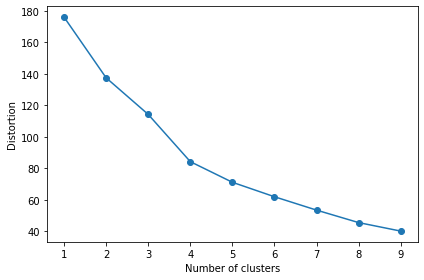

In [24]:
distortions = []
for i in range(1, 10):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(utils2)
    distortions.append(km.inertia_)
plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [25]:
# 과적합을 피하기 위해 적당한 클러스터수를 결정한다.

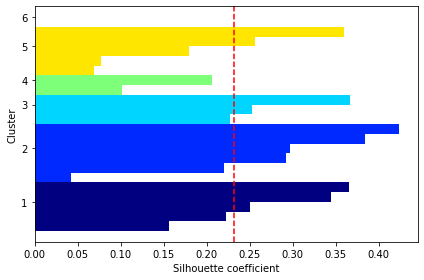

In [26]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(utils2, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

# Ch10. hierarchical cluster analysis (HCA)

- 데이터가 적은 경우(50개 미만)에만 계층적 군집분석 방법을 이용한다. (연산량 문제)
- 그보다 더 많은 경우, k-mean 방법을 사용한다.
- HCA 방법의 경우, 트리 모형 그래프를 통해 유사한 개체를 확인하며 직관적으로 확인할 수 있다.

## distance matrix
- **반드시 표준화한 값을 입력값으로 유클리디안 거리를 구할 것**

In [32]:
# import
from scipy.spatial.distance import pdist, squareform

# create dist-matrix
row_dist = pd.DataFrame(squareform(pdist(utils2, 
                                         metric='euclidean')),
                        columns=utils2.index,
                        index=utils2.index)
row_dist.iloc[:5, :5]

Company,Arizona,Boston,Central,Commonwealth,NY
Company,,,,,
Arizona,0.000000,3.169015,3.765812,2.520090,4.220157
Boston,3.169015,0.000000,5.032163,2.215142,3.943517
Central,3.765812,5.032163,0.000000,4.203729,4.573896
Commonwealth,2.520090,2.215142,4.203729,0.000000,4.224495
NY,4.220157,3.943517,4.573896,4.224495,0.000000


In [33]:
# from Arizona to Arizona == 0 (itself)

In [35]:
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(utils2.values, 
                       method='complete', 
                       metric='euclidean')

pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      '거리', '클러스터 샘플 갯수.'],
             index=[f'cluster {i+1}' for i in range(row_clusters.shape[0])])

,row label 1,row label 2,거리,클러스터 샘플 갯수.
cluster 1,11.0,20.0,1.416696,2.0
cluster 2,9.0,12.0,1.440143,2.0
cluster 3,3.0,19.0,1.859211,2.0
cluster 4,13.0,18.0,1.920200,2.0
cluster 5,0.0,17.0,1.921424,2.0
cluster 6,7.0,15.0,2.253263,2.0
cluster 7,14.0,22.0,2.383636,3.0
cluster 8,1.0,21.0,2.478910,2.0
cluster 9,25.0,26.0,2.531909,4.0
cluster 10,23.0,24.0,2.637646,4.0


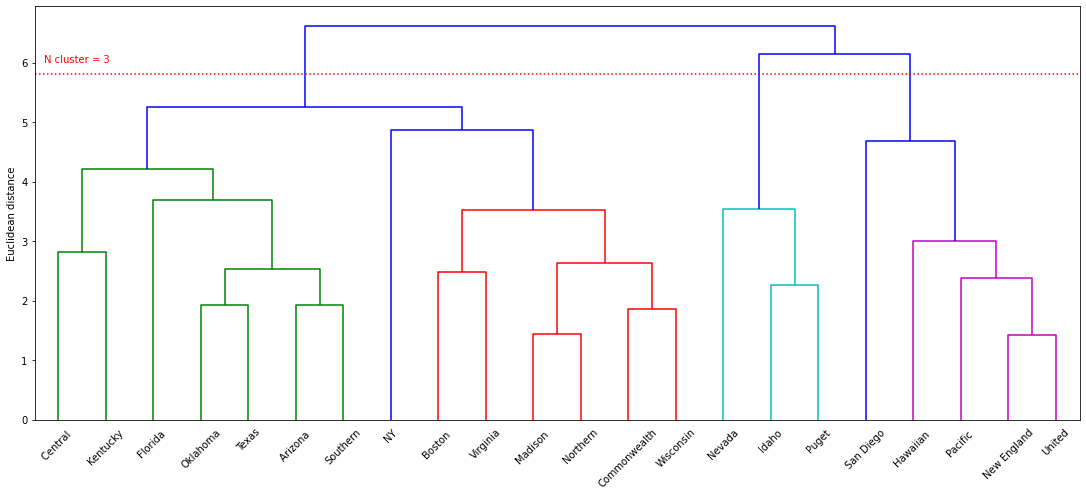

In [49]:
from scipy.cluster.hierarchy import dendrogram

fig, axes = plt.subplots(figsize=(15,7))

dendr = dendrogram(row_clusters,
                   labels=utils2.index)

plt.axhline(5.8, 0, 1, linestyle= ':', color= 'r')
plt.text(2, 6, 'N cluster = 3', color= 'r')

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

In [42]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3, 
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(utils2)
print(f'클러스터 레이블: {labels}')

클러스터 레이블: [0 0 0 0 0 0 1 2 0 0 2 1 0 0 1 2 1 0 0 0 1 0]


Source | [기계학습 w/ Python](https://youtube.com/playlist?list=PLEUKy_nwlzwHmQZUPvYWUsy73wBrz7XFN)